In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i)) 
processed_data = processed_data.drop(to_drop, 1).drop('label', 1)
processed_data = processed_data.replace(0, 'A')\
                              .replace(1, 'T')\
                              .replace(2, 'C')\
                              .replace(3, 'G')
processed_data = pd.get_dummies(processed_data)
processed_data=pd.concat((processed_data, data['label']), axis = 1)
data = processed_data
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.33, 
                                                    random_state = 2)

# Наивный байесовский классификатор

In [18]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X, y)

GaussianNB(priors=None)

$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

In [19]:
from sklearn.metrics import confusion_matrix
# Ошибки на обучающей и тестовойвыборке
print (np.mean(y != nb_model.predict(X)), np.mean(y_test != nb_model.predict(X_test)))
print(confusion_matrix(nb_model.predict(X), y)) # confusion matrix for train sample
print(confusion_matrix(nb_model.predict(X_test), y_test)) # confusion matrix for test sample

0.148631840796 0.152777777778
[[705 142]
 [ 97 664]]
[[342  65]
 [ 56 329]]


In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB() # another model
nb_model.fit(X, y)
# Ошибки на обучающей и тестовойвыборке
print (np.mean(y != nb_model.predict(X)), np.mean(y_test != nb_model.predict(X_test)))
print(confusion_matrix(nb_model.predict(X), y)) # confusion matrix for train sample
print(confusion_matrix(nb_model.predict(X_test), y_test)) # confusion matrix for test sample

0.147388059701 0.15404040404
[[690 125]
 [112 681]]
[[335  59]
 [ 63 335]]


In [21]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X, y)
# Ошибки на обучающей и тестовойвыборке
print (np.mean(y != nb_model.predict(X)), np.mean(y_test != nb_model.predict(X_test)))
print(confusion_matrix(nb_model.predict(X), y)) # confusion matrix for train sample
print(confusion_matrix(nb_model.predict(X_test), y_test)) # confusion matrix for test sample

0.14552238806 0.14898989899
[[693 125]
 [109 681]]
[[339  59]
 [ 59 335]]


## ROC-кривая

In [39]:
from sklearn.metrics import roc_curve
proba = nb_model.predict_proba(X_test)[:, 1]

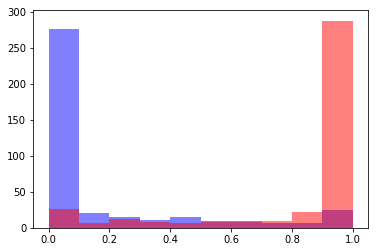

In [44]:
plt.hist(proba[y_test == 0], color = 'b', alpha = 0.5, normed = False)
plt.hist(proba[y_test == 1], color = 'r', alpha = 0.5, normed = False)
pass

[-0.05, 1.05, -0.05, 1.05]

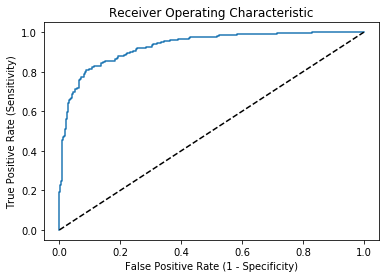

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, proba)
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])